In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv(r"E:\household_power_consumption.txt"
                      , sep=';', header=0, infer_datetime_format=True,
                      parse_dates={'datetime':[0,1]},  index_col=['datetime'])


C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [36]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
print(f"The data has {data.shape[0]} rows and {data.shape[1]} columns")

The data has 2075259 rows and 7 columns


In [5]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [6]:
data.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
percent_missing = data.isnull().sum() * 100 / len(data)

In [8]:
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

In [9]:
missing_value_df

,percent_missing
Global_active_power,0.000000
Global_reactive_power,0.000000
Voltage,0.000000
Global_intensity,0.000000
Sub_metering_1,0.000000
Sub_metering_2,0.000000
Sub_metering_3,1.251844


In [10]:
data.loc[data.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,?,?,?,?,?,?,NaN
2006-12-30 10:08:00,?,?,?,?,?,?,NaN
2006-12-30 10:09:00,?,?,?,?,?,?,NaN
2007-01-14 18:36:00,?,?,?,?,?,?,NaN


In [11]:
data.replace('?', np.nan, inplace=True)

In [12]:
data.loc[data.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
for i in data.columns: data[i].astype('float64')

In [14]:
data.shape

(2075259, 7)

In [15]:
data.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [16]:
data.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_active_power', ylabel='Density'>

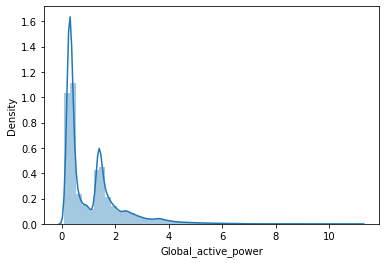

In [17]:
sns.distplot(data['Global_active_power'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_active_power'>

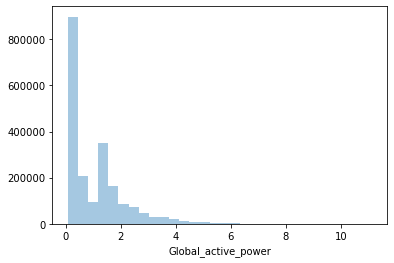

In [18]:
sns.distplot(data['Global_active_power'], kde=False,bins=30)

<AxesSubplot:xlabel='Global_reactive_power'>

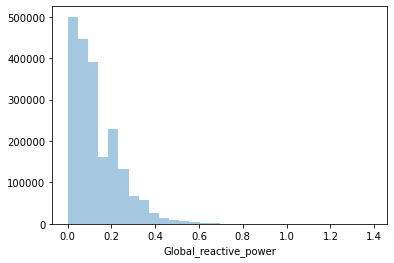

In [19]:
sns.distplot(data['Global_reactive_power'], kde=False,bins=30)

<AxesSubplot:xlabel='Voltage'>

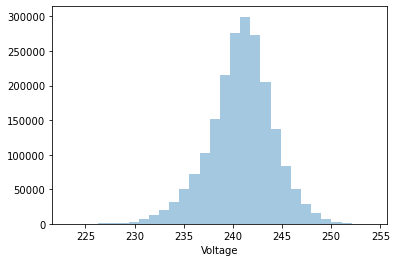

In [20]:
sns.distplot(data['Voltage'], kde=False,bins=30)

<AxesSubplot:xlabel='Global_intensity'>

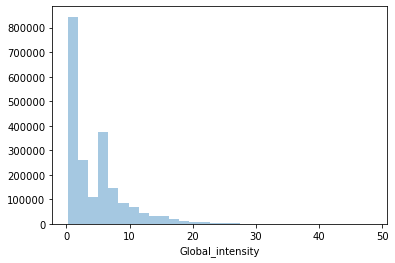

In [21]:
sns.distplot(data['Global_intensity'], kde=False,bins=30)

In [22]:
data.corr()

,Sub_metering_3
Sub_metering_3,1.0


In [23]:
pearson = data.corr(method='pearson')

In [25]:
pearson

,Sub_metering_3
Sub_metering_3,1.0


TypeError: 'value' must be an instance of str or bytes, not a float

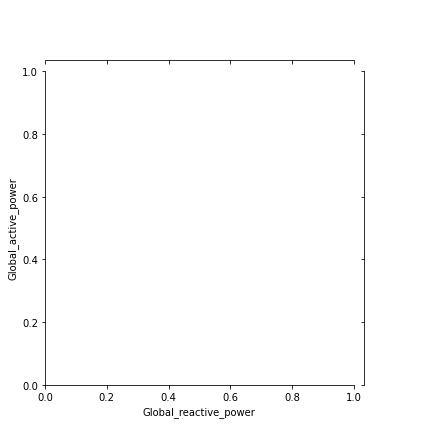

In [24]:
sns.jointplot( x = 'Global_reactive_power' , y = 'Global_active_power' , data = data , kind = 'scatter' )

In [26]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [29]:
data['Global_active_power']

datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
                       ...  
2010-11-26 20:58:00    0.946
2010-11-26 20:59:00    0.944
2010-11-26 21:00:00    0.938
2010-11-26 21:01:00    0.934
2010-11-26 21:02:00    0.932
Name: Global_active_power, Length: 2075259, dtype: object

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: 'value' must be an instance of str or bytes, not a float

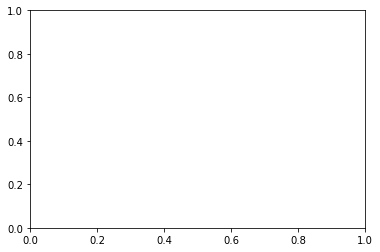

In [32]:
sns.scatterplot(data['Global_reactive_power'] , data['Global_active_power'])

In [38]:
from sklearn.model_selection import train_test_split

In [63]:
data = data.dropna()

In [54]:
x = data.iloc[:,[1,3,4,5,6]]
y = data.iloc[:,0]

In [55]:
x.head()

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,
2006-12-16 17:24:00,0.418,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,0.436,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,0.498,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,0.502,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,0.528,15.800,0.000,1.000,17.0


In [56]:
y.head

<bound method NDFrame.head of datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
                       ...  
2010-11-26 20:58:00    0.946
2010-11-26 20:59:00    0.944
2010-11-26 21:00:00    0.938
2010-11-26 21:01:00    0.934
2010-11-26 21:02:00    0.932
Name: Global_active_power, Length: 2049280, dtype: object>

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [58]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1434496, 5)
(614784, 5)
(1434496,)
(614784,)


In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lm = LinearRegression()

In [61]:
lm.fit(x_train,y_train)

LinearRegression()

In [62]:
predictions = lm.predict(x_test)

In [49]:
x_train.head()

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,
2008-04-30 23:16:00,0.236,2.000,0.000,0.000,1.0
2010-01-21 05:03:00,0.100,1.200,0.000,0.000,1.0
2010-05-11 23:04:00,0.072,4.200,0.000,0.000,1.0
2007-07-06 13:55:00,0.084,0.800,0.000,0.000,0.0
2007-06-26 15:02:00,0.092,1.000,0.000,0.000,0.0


In [50]:
x_train.isnull().sum()

Global_reactive_power        0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           18269
dtype: int64

In [51]:
y_train.isnull().sum()

0

In [52]:
y_train

datetime
2008-04-30 23:16:00    0.428
2010-01-21 05:03:00    0.316
2010-05-11 23:04:00    1.020
2007-07-06 13:55:00    0.196
2007-06-26 15:02:00    0.206
                       ...  
2008-03-19 18:59:00    1.196
2007-05-07 19:38:00    0.816
2009-11-09 19:17:00    1.458
2009-05-11 21:19:00    2.824
2009-04-15 19:31:00    1.044
Name: Global_active_power, Length: 1452681, dtype: object

In [64]:
from sklearn import metrics

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R Squares value:',metrics.r2_score(y_test, predictions))

MAE: 0.027455608456450387
MSE: 0.0018226463072696978
RMSE: 0.04269246194903379
R Squares value: 0.9983631695586828


In [68]:
import pickle
filename = 'PCA_model.pkl'
pickle.dump(lm, open(filename, 'wb'))